<a href="https://www.kaggle.com/theyazilimci/hollywood-market?scriptVersionId=86663205" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Data Importation 

In [1]:
import seaborn as sns
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# File path
"""
/kaggle/input/hollywood-theatrical-market-synopsis-1995-to-2021/TopGrossingRatings.csv
/kaggle/input/hollywood-theatrical-market-synopsis-1995-to-2021/TopGrossingSources.csv
/kaggle/input/hollywood-theatrical-market-synopsis-1995-to-2021/HighestGrossers.csv
/kaggle/input/hollywood-theatrical-market-synopsis-1995-to-2021/AnnualTicketSales.csv
/kaggle/input/hollywood-theatrical-market-synopsis-1995-to-2021/WideReleasesCount.csv
"""

'\n/kaggle/input/hollywood-theatrical-market-synopsis-1995-to-2021/TopGrossingRatings.csv\n/kaggle/input/hollywood-theatrical-market-synopsis-1995-to-2021/TopGrossingSources.csv\n/kaggle/input/hollywood-theatrical-market-synopsis-1995-to-2021/HighestGrossers.csv\n/kaggle/input/hollywood-theatrical-market-synopsis-1995-to-2021/AnnualTicketSales.csv\n/kaggle/input/hollywood-theatrical-market-synopsis-1995-to-2021/WideReleasesCount.csv\n'

In [2]:
annualTicket = pd.read_csv("/kaggle/input/hollywood-theatrical-market-synopsis-1995-to-2021/AnnualTicketSales.csv")

annualTicket.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Unnamed: 5
0,2021,"42,37,74,881","$3,881,777,912","$3,881,777,912",$9.16,NaN
1,2020,"22,36,38,958","$2,048,534,616","$2,048,534,616",$9.16,NaN
2,2019,"1,22,85,41,629","$11,253,443,955","$11,253,444,050",$9.16,NaN
3,2018,"1,31,15,36,128","$11,948,096,650","$12,013,670,952",$9.11,NaN
4,2017,"1,22,56,39,761","$10,993,991,460","$11,226,860,216",$8.97,NaN


#### We need to change the type of columns to be analysed there are String type.

In [3]:
def convertString():
    
    annualTicket = pd.read_csv("/kaggle/input/hollywood-theatrical-market-synopsis-1995-to-2021/AnnualTicketSales.csv")
    
    annualTicket['TICKETS SOLD'] = annualTicket['TICKETS SOLD'].str.replace(',','')
    
    annualTicket['TOTAL BOX OFFICE'] = annualTicket['TOTAL BOX OFFICE'].str.replace(',','')
    annualTicket['TOTAL BOX OFFICE'] = annualTicket['TOTAL BOX OFFICE'].str.replace('$','')
    
    annualTicket['TOTAL INFLATION ADJUSTED BOX OFFICE'] = annualTicket['TOTAL INFLATION ADJUSTED BOX OFFICE'].str.replace(',','')
    annualTicket['TOTAL INFLATION ADJUSTED BOX OFFICE'] = annualTicket['TOTAL INFLATION ADJUSTED BOX OFFICE'].str.replace('$','')

    annualTicket['AVERAGE TICKET PRICE'] = annualTicket['AVERAGE TICKET PRICE'].str.replace('$','')
    
    annualTicket['TICKETS SOLD'] = annualTicket['TICKETS SOLD'].astype(int)
    annualTicket['TOTAL BOX OFFICE'] = annualTicket['TOTAL BOX OFFICE'].astype(int)
    annualTicket['TOTAL INFLATION ADJUSTED BOX OFFICE'] = annualTicket['TOTAL INFLATION ADJUSTED BOX OFFICE'].astype(int)
    
    annualTicket['AVERAGE TICKET PRICE'] = annualTicket['AVERAGE TICKET PRICE'].astype(float)
    
    
    return annualTicket

annualTicket = convertString()
annualTicket.dtypes

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  del sys.path[0]


YEAR                                     int64
TICKETS SOLD                             int64
TOTAL BOX OFFICE                         int64
TOTAL INFLATION ADJUSTED BOX OFFICE      int64
AVERAGE TICKET PRICE                   float64
Unnamed: 5                             float64
dtype: object

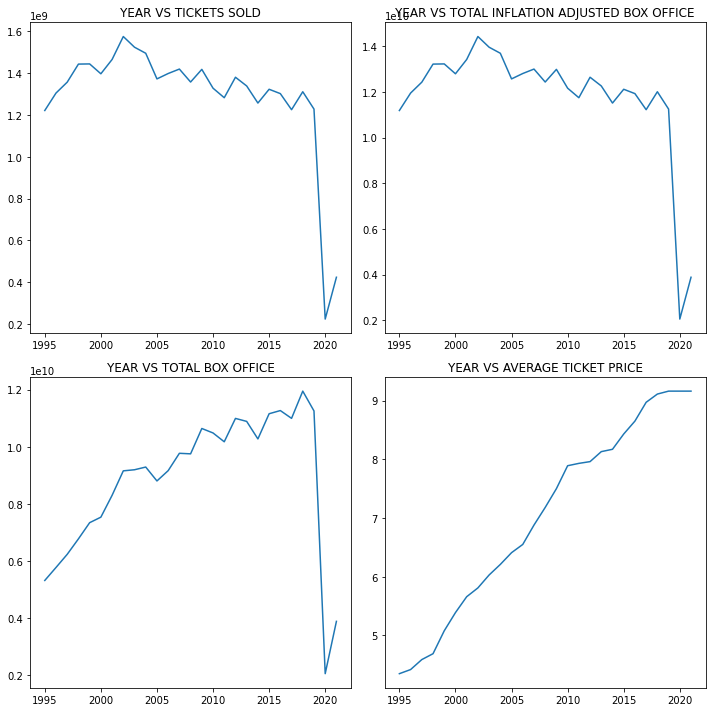

In [4]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))

axs[0, 0].plot(annualTicket['YEAR'], annualTicket['TICKETS SOLD'])
axs[0, 0].set_title("YEAR VS TICKETS SOLD")
axs[1, 0].plot(annualTicket['YEAR'], annualTicket['TOTAL BOX OFFICE'])
axs[1, 0].set_title("YEAR VS TOTAL BOX OFFICE")
axs[0, 1].plot(annualTicket['YEAR'], annualTicket['TOTAL INFLATION ADJUSTED BOX OFFICE'])
axs[0, 1].set_title("YEAR VS TOTAL INFLATION ADJUSTED BOX OFFICE")
axs[1, 1].plot(annualTicket['YEAR'], annualTicket['AVERAGE TICKET PRICE'])
axs[1, 1].set_title("YEAR VS AVERAGE TICKET PRICE")

fig.tight_layout()

#### The price has increased as the ticket sold 

We can observe the impacte of Covid 19 in the World of Cinema 
but the price have not changed or decreased,a linear regression method can be build to predict the price in 15 years 

In [5]:
topGrossRating = pd.read_csv("/kaggle/input/hollywood-theatrical-market-synopsis-1995-to-2021/TopGrossingRatings.csv")
topGrossSource = pd.read_csv("/kaggle/input/hollywood-theatrical-market-synopsis-1995-to-2021/TopGrossingSources.csv")


In [6]:
topGrossRating.head()

topGrossRating['MARKET SHARE'] = topGrossRating['MARKET SHARE'].str.replace('%','')
topGrossRating['MARKET SHARE'] = topGrossRating['MARKET SHARE'].astype(float)

In [7]:
topGrossRating.head()

,RANK,MPAA RATINGS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,PG-13,"3,243","$113,524,789,243","$35,006,102",47.75
1,2,R,"5,480","$63,497,164,978","$11,587,074",26.71
2,3,PG,"1,535","$49,124,317,794","$32,002,813",20.66
3,4,G,395,"$9,572,240,391","$24,233,520",4.03
4,5,Not Rated,"5,820","$1,918,358,283","$329,615",0.81


([<matplotlib.patches.Wedge at 0x7f9171d0db10>,
 [Text(0.21098305348590918, 2.9925718289026517, 'PG-13'),
  Text(-2.2973928196354967, -1.9292449902195576, 'R'),
  Text(1.7337885916338711, -2.4482600187725643, 'PG'),
  Text(2.9521773865757286, -0.5335247681138162, 'G'),
  Text(2.9989299964482683, -0.08011789065365346, 'Not Rated'),
  Text(2.9999994070937617, -0.0018861169315217967, 'NC-17'),
  Text(2.9999999999998974, -7.844898205065291e-07, 'Open'),
  Text(2.9999999999998974, -7.844898205065291e-07, 'GP')],
 [Text(0.19340113236208342, 2.743190843160764, '48%'),
  Text(-2.1059434179992054, -1.7684745743679278, '27%'),
  Text(1.5893062089977152, -2.2442383505415173, '21%'),
  Text(2.7061626043610842, -0.4890643707709982, '4%'),
  Text(2.7490191634109125, -0.07344139976584901, '1%'),
  Text(2.7499994565026147, -0.001728940520561647, '0%'),
  Text(2.749999999999906, -7.191156687976516e-07, '0%'),
  Text(2.749999999999906, -7.191156687976516e-07, '0%')])

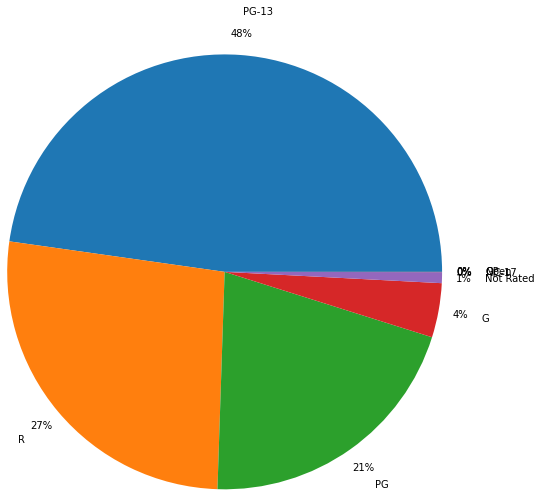

In [8]:
plt.pie(topGrossRating['MARKET SHARE'],labels = topGrossRating['MPAA RATINGS'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,radius=2.5)

In [9]:
topGrossSource['MARKET SHARE'] = topGrossSource['MARKET SHARE'].str.replace('%','')
topGrossSource['MARKET SHARE'] = topGrossSource['MARKET SHARE'].astype(float)

([<matplotlib.patches.Wedge at 0x7f9171c266d0>,
 [Text(0.33485187342484457, 2.9812538004778917, 'Original Screenplay'),
  Text(-2.7380571875098134, -1.2259864754253411, 'Based on Fiction Book/Short Story'),
  Text(-0.5505697890756558, -2.949046101260065, 'Based on Comic/Graphic Novel'),
  Text(0.9210942864408443, -2.855098127120333, 'Remake'),
  Text(1.802066229153029, -2.3984489374898486, 'Based on Real Life Events'),
  Text(2.449731622030883, -1.7317086879789967, 'Based on TV'),
  Text(2.8094012332604223, -1.052266463665367, 'Based on Factual Book/Article'),
  Text(2.9379082043543288, -0.6072029173081464, 'Spin-Off'),
  Text(2.9835792936041674, -0.3134558960626773, 'Based on Folk Tale/Legend/Fairytale'),
  Text(2.998736632614783, -0.08705520210850234, 'Based on Play')],
 [Text(0.30694755063944085, 2.7328159837714003, '46%'),
  Text(-2.5098857552173293, -1.1238209358065625, '21%'),
  Text(-0.5046889733193511, -2.703292259488393, '10%'),
  Text(0.8443364292374407, -2.617173283193638, '

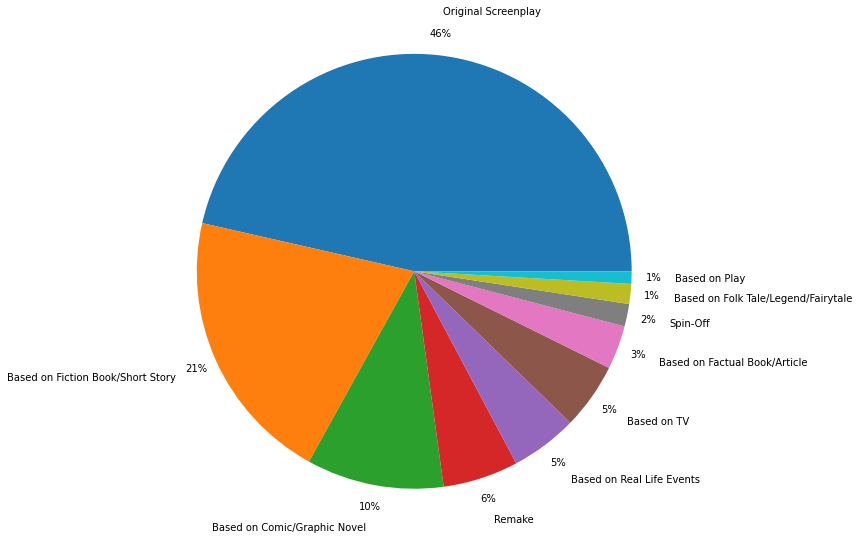

In [10]:
plt.pie(topGrossSource['MARKET SHARE'],labels = topGrossSource['SOURCES'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,radius=2.5)

#### Original Screenplay have 46 % of the market place 

In [11]:
highestGross = pd.read_csv('/kaggle/input/hollywood-theatrical-market-synopsis-1995-to-2021/HighestGrossers.csv')

highestGross.head()

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,"$184,031,112","$387,522,978","4,23,06,002"
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,"$306,169,255","$634,504,608","6,92,69,062"
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,"$250,650,052","$500,207,943","5,46,07,854"
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,"$443,319,081","$865,842,808","9,45,24,324"
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,"$430,443,350","$776,153,749","8,47,32,942"


In [12]:
highestGross['TICKETS SOLD'] = highestGross['TICKETS SOLD'].str.replace(',','')
highestGross['TICKETS SOLD'] = highestGross['TICKETS SOLD'].astype(int)

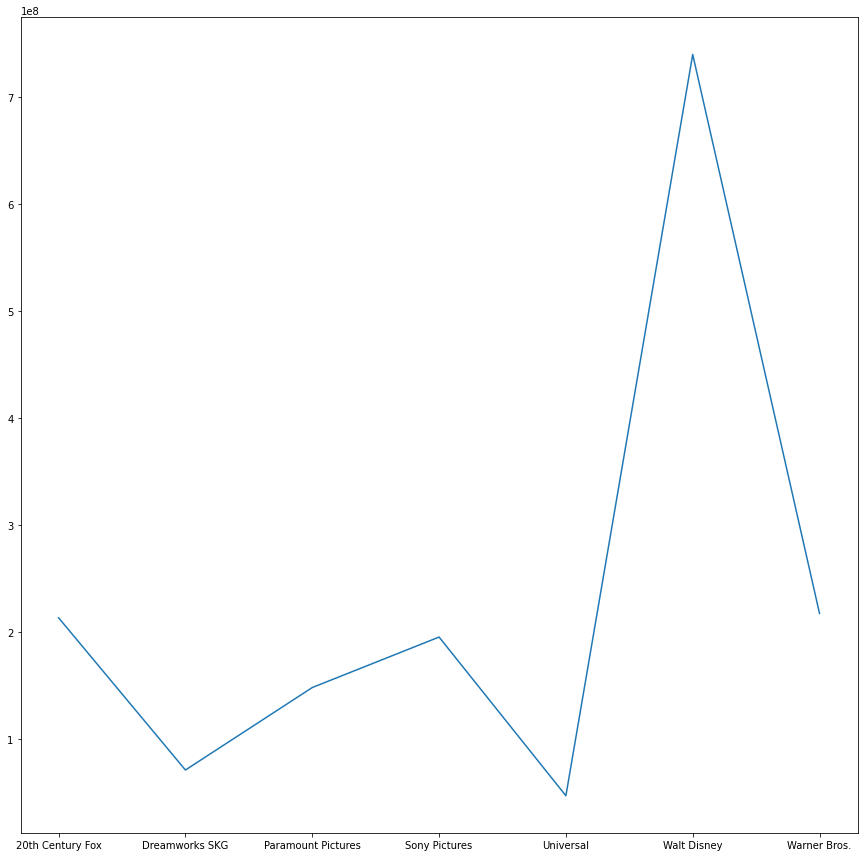

In [13]:
fig, axs = plt.subplots(1,1,figsize=(15,15))


nameDistributor = highestGross.groupby('DISTRIBUTOR')['TICKETS SOLD'].sum()

plt.plot(nameDistributor)

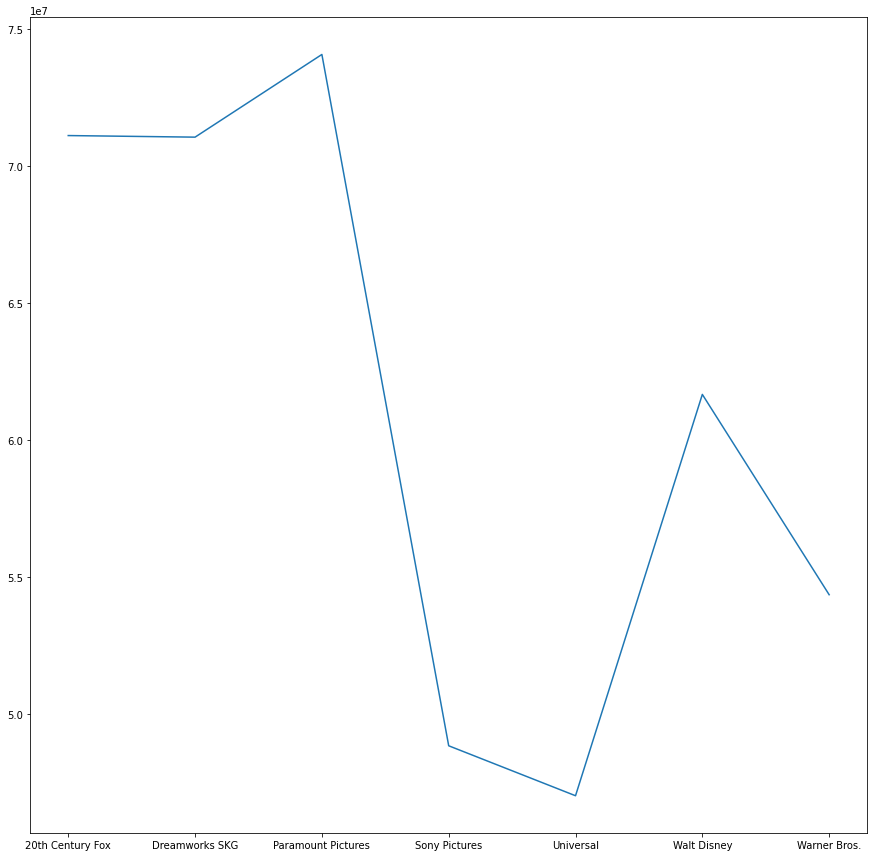

In [14]:
fig, axs = plt.subplots(1,1,figsize=(15,15))

meanTicketSold = highestGross.groupby('DISTRIBUTOR')['TICKETS SOLD'].mean()

plt.plot(meanTicketSold)

### Walt Disney has sold the most ticket because they have lot of film but in terms of average the Film made by Paramount Pictures is better than any Distributor

In [15]:
highestGross[['GENRE','YEAR']]

,GENRE,YEAR
0,Drama,1995
1,Adventure,1996
2,Adventure,1997
3,Adventure,1998
4,Adventure,1999
5,Adventure,2000
6,Adventure,2001
7,Adventure,2002
8,Adventure,2003
9,Adventure,2004
